# Linear Regression Implementation

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from multiple_lr import gradient_descent, _compute_cost, predict
from utils import z_normalize

In [22]:
# Read dataset
file_path = "Ecommerce Customers"
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [23]:
# Target and features
features = [
    "Avg. Session Length",
    "Time on App",
    "Time on Website",
    "Length of Membership",
]
X = df[features]
y = df["Yearly Amount Spent"]
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (500, 4)
Target shape: (500,)


In [24]:
# Normalize data and Split
X_norm = z_normalize(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, test_size=0.2, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (400, 4)
X_test shape: (100, 4)
y_train shape: (400,)
y_test shape: (100,)


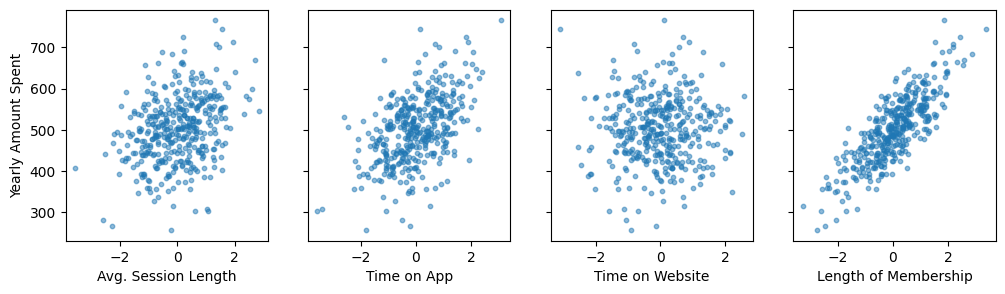

In [25]:
# Visualize the corelation between each feature and target
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(features)):
    ax[i].scatter(X_train[features[i]], y_train, s=10, alpha=0.5)
    ax[i].set_xlabel(features[i])
ax[0].set_ylabel("Yearly Amount Spent")
plt.show()

# Choosing Features

- The 1<sup>st</sup> and 2<sup>nd</sup> features have faint corelation with the target
- The 3<sup>rd</sup> feature appears to follow a Gaussian distribution and have little impact to the target
- The 4<sup>th</sup> feature shows strong corelation

We can choose 3 of them first, and try again with only the last feature to see which solution is better.

In [26]:
# Drop 3rd feature
try:
    X_train = X_train.drop(columns="Time on Website")
    X_test = X_test.drop(columns="Time on Website")
    y_train = y_train.drop(columns="Time on Website")
    y_test = y_test.drop(columns="Time on Website")
except:
    pass

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (400, 3)
X_test shape: (100, 3)
y_train shape: (400,)
y_test shape: (100,)


In [27]:
# Turn pandas DataFrame to numpy array
try:
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
except:
    pass

# Implementing Multiple Linear Regression From Scratch

In [28]:
# Initiate weights and bias
w = np.zeros(X_train.shape[1])
b = 0.0
print(f"Initial cost: {_compute_cost(X_train, y_train, w, b)}")

Initial cost: 129285.0709230924


## Trying different learning rates and choose an optimal one

0th cost: 129023.01375952883
1000th cost: 17071.19653318297
2000th cost: 2314.490828793915
3000th cost: 352.03441312748487
4000th cost: 89.02279138106222
5000th cost: 53.53685895098765
6000th cost: 48.721493987173766
7000th cost: 48.06485100649255
8000th cost: 47.974933602780105
9000th cost: 47.962576690493826


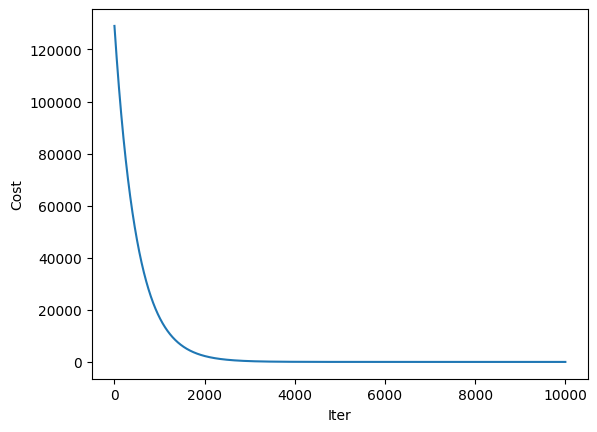

Optimal w: [25.38307557 38.54674377 61.78067665], Optimal b: 499.4187705848941


In [29]:
# Run gradient descent and plot cost per iter
w_optimal, b_optimal = gradient_descent(
    X_train,
    y_train,
    w,
    b,
    num_iters=10_000,
    learning_rate=1e-3,
    plot_cost_per_iter=True,
)
print(f"Optimal w: {w_optimal}, Optimal b: {b_optimal}")

0th cost: 542395.5345925133
100th cost: 1.4788932403560094e+78
200th cost: 1.4458306960966305e+151
300th cost: 1.4135073072898792e+224
400th cost: 1.3819065490558556e+297
500th cost: inf


c:\Users\dell\ML-Projects\E-commerce-regression\multiple_lr.py:17: RuntimeWarning: overflow encountered in scalar add
  cost += e
c:\Users\dell\ML-Projects\E-commerce-regression\multiple_lr.py:16: RuntimeWarning: overflow encountered in scalar power
  e = (y_hat - y[i]) ** 2


600th cost: inf
700th cost: inf
800th cost: inf
900th cost: nan


c:\Users\dell\ML-Projects\E-commerce-regression\multiple_lr.py:40: RuntimeWarning: overflow encountered in scalar add
  dJ_dw[j] += e * X[i, j]


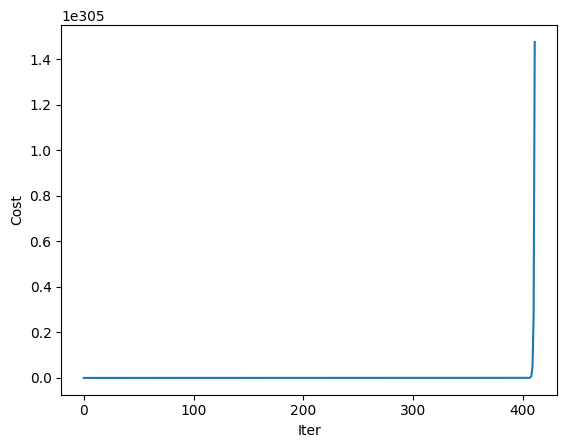

Optimal w: [nan nan nan], Optimal b: nan


In [30]:
# Run gradient descent and plot cost per iter
w_optimal, b_optimal = gradient_descent(
    X_train, y_train, w, b, num_iters=1000, learning_rate=3, plot_cost_per_iter=True
)
print(f"Optimal w: {w_optimal}, Optimal b: {b_optimal}")

0th cost: 392.5925217479484
50th cost: 47.96059999478538
100th cost: 47.96059999478538
150th cost: 47.96059999478538
200th cost: 47.96059999478538
250th cost: 47.96059999478538
300th cost: 47.96059999478538
350th cost: 47.96059999478538
400th cost: 47.96059999478538
450th cost: 47.96059999478538


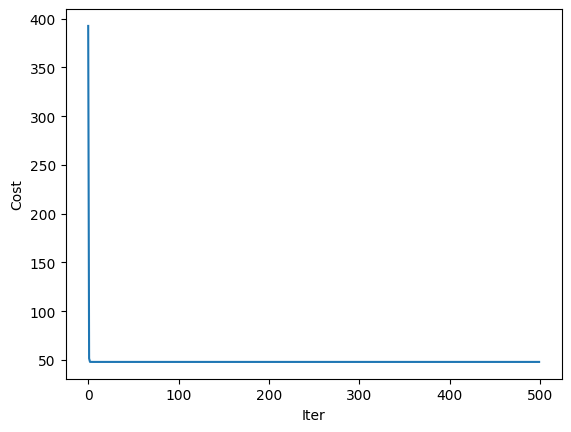

Optimal w: [25.38330554 38.5481121  61.77570063], Optimal b: 499.4417463019055


In [31]:
# Run gradient descent and plot cost per iter
w_optimal, b_optimal = gradient_descent(
    X_train, y_train, w, b, num_iters=500, learning_rate=1, plot_cost_per_iter=True
)
print(f"Optimal w: {w_optimal}, Optimal b: {b_optimal}")

## Learning rate decision

- alpha=1
- num_iters=500

In [32]:
# Prediction and evaluation
y_pred = predict(X_test, w_optimal, b_optimal)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

Mean Squared Error: 110.32288587780613


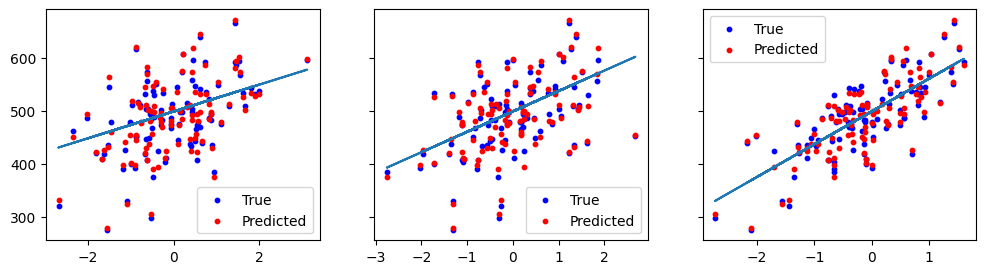

In [33]:
# Visualization
n_features = X_test.shape[1]

_, ax = plt.subplots(1, n_features, figsize=(12, 3), sharey=True)
for i in range(n_features):
    ax[i].scatter(X_test[:, i], y_test, c="b", s=10, label="True")
    ax[i].scatter(X_test[:, i], y_pred, c="r", s=10, label="Predicted")
    ax[i].plot(X_test[:, i], X_test[:, i] * w_optimal[i] + b_optimal)
    ax[i].legend()
plt.show()

# Implementing Multiple Linear Regression using Scikit-learn